# Worksheet 19

Name:  Huanjia Liang
UID: U62794192

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9963929854355493
0.9964072481813646
0.9964439275411091
0.9964545791960664
0.9964698989147993
0.9964750980873857
0.9964770384808319
0.9966556340980921
0.9966578549875543
0.9967195722951782
0.9967385356482871
0.9967417810152559
0.9967721344817971
0.9968183319600747


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[1, 1, 1, 1, 1]
0.03125


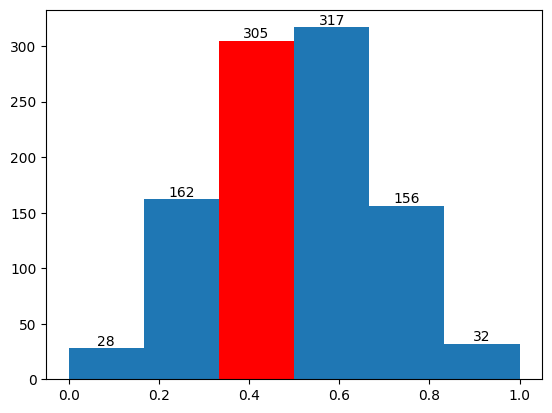

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

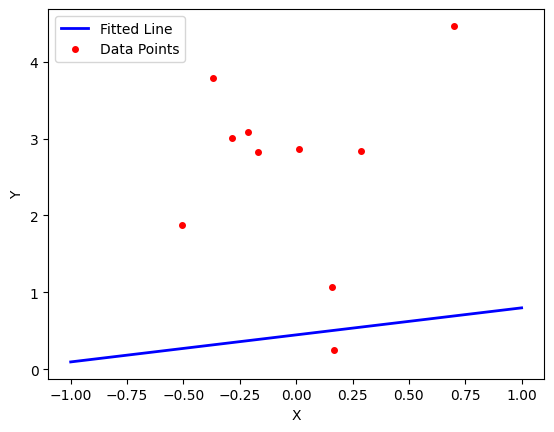

In [3]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = 3 + np.random.randn(SAMPLE_SIZE)  # Change the intercept value (3 in this case) based on your requirement

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.random.randn(2)  # You need to specify the coefficients for the linear regression model

xplot = np.linspace(-1, 1, 20)
X_plot = np.array([np.ones_like(xplot), xplot]).T

# Calculate the estimated y values
yestplot = np.dot(X_plot, beta)

plt.plot(xplot, yestplot, 'b-', lw=2, label='Fitted Line')
plt.plot(xlin, y, 'ro', markersize=4, label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

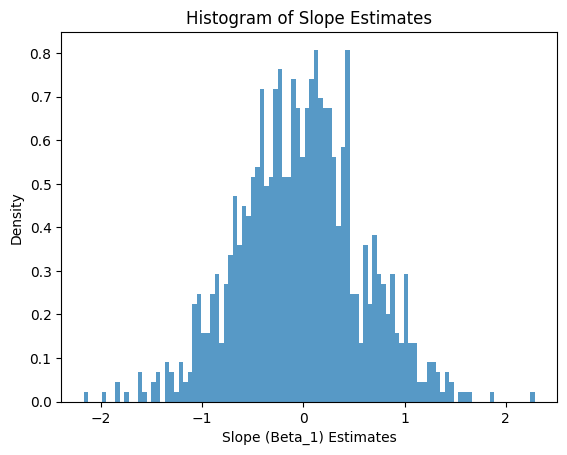

In [4]:
SAMPLE_SIZE = 10

def generate_data(sample_size):
    x = -1.0 + 2.0 * np.random.random(sample_size)
    y = 3 + np.random.randn(sample_size)
    return x, y

beta_hist = []

for _ in range(1000):
    x, y = generate_data(SAMPLE_SIZE)
    
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    
    beta = np.linalg.lstsq(X, y, rcond=None)[0]  # Using least squares for parameter estimation
    beta_hist.append(beta[1])

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True, alpha=0.75)
ax.set_xlabel('Slope (Beta_1) Estimates')
ax.set_ylabel('Density')
plt.title('Histogram of Slope Estimates')
plt.show()

- In this code, np.linalg.lstsq is used to perform least squares regression and obtain the parameter estimates for each dataset. The histogram is then plotted to show the distribution of the slope (Beta_1) estimates.

- As we increase the sample size (SAMPLE_SIZE), we observe that the histogram becomes more concentrated around the true value of the slope. This is in line with the concept of the law of large numbers, which states that as the sample size increases, the sample mean (in this case, the parameter estimate) converges to the true population mean. Larger sample sizes generally result in more accurate and reliable parameter estimates.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

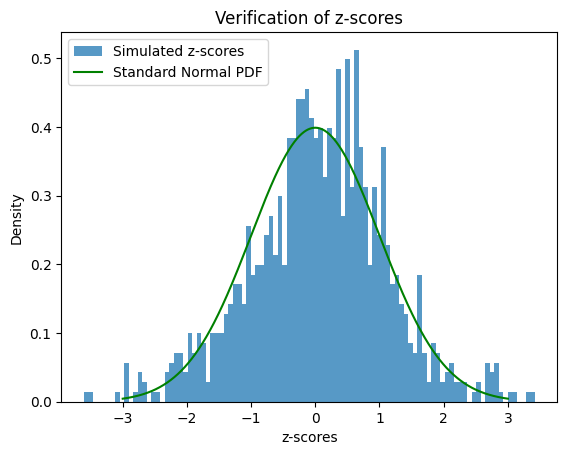

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

SAMPLE_SIZE = 10

def generate_data(sample_size):
    x = -1.0 + 2.0 * np.random.random(sample_size)
    y = 3 + np.random.randn(sample_size)
    return x, y

beta_hist = []

for _ in range(1000):
    x, y = generate_data(SAMPLE_SIZE)
    
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    beta_hist.append(beta[1])

# Calculate the standard deviation and the diagonal element of (X^TX)^-1
sigma_squared = np.var(y, ddof=2)
X_transpose_X_inv = np.linalg.inv(np.dot(X.T, X))
S_kk = X_transpose_X_inv[1, 1]

# Calculate the z-score
z_scores = (np.array(beta_hist) - beta[1]) / np.sqrt(sigma_squared * S_kk)

# Plot histogram and standard normal pdf
xs = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots()
ax.hist(z_scores, bins=100, density=True, alpha=0.75, label='Simulated z-scores')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal PDF')
ax.set_xlabel('z-scores')
ax.set_ylabel('Density')
plt.legend()
plt.title('Verification of z-scores')
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

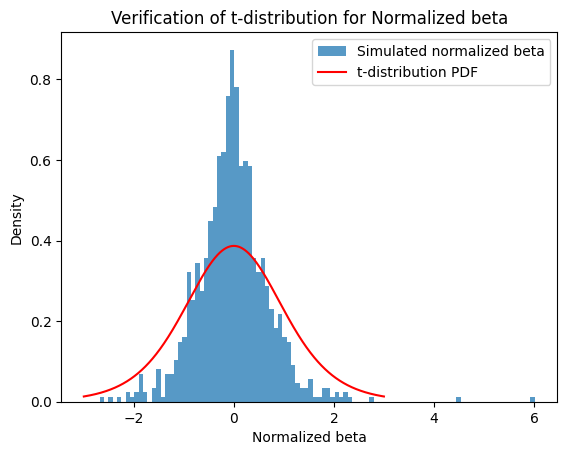

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

SAMPLE_SIZE = 10

def generate_data(sample_size):
    x = -1.0 + 2.0 * np.random.random(sample_size)
    y = 3 + np.random.randn(sample_size)
    return x, y

def standard_error(y_true, y_pred, p):
    rss = np.sum((y_true - y_pred) ** 2)
    n = len(y_true)
    s = np.sqrt(rss / (n - p))
    return s

beta_hist = []

for _ in range(1000):
    x, y = generate_data(SAMPLE_SIZE)
    
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = np.dot(X, beta)
    
    s = standard_error(y, y_pred, 2)  # p=2 for intercept and slope
    
    # Normalized beta using the unbiased estimate of the standard deviation
    normalized_beta = beta[1] / s
    
    beta_hist.append(normalized_beta)

# Plot histogram and t-distribution pdf
xs = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True, alpha=0.75, label='Simulated normalized beta')
ax.plot(xs, t.pdf(xs, df=SAMPLE_SIZE - 2), color='red', label='t-distribution PDF')
ax.set_xlabel('Normalized beta')
ax.set_ylabel('Density')
plt.legend()
plt.title('Verification of t-distribution for Normalized beta')
plt.show()


f) You are given the following dataset:

[0.50155603 1.19902827]


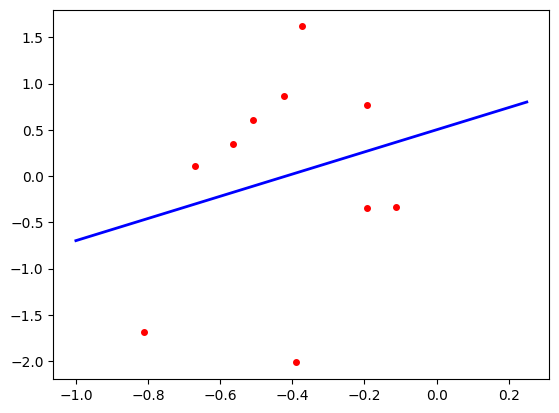

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [8]:
import numpy as np
from scipy.stats import t

# Given dataset
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Design matrix
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T

# Coefficient estimate
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Residuals
residuals = y - X @ beta_hat

# Degrees of freedom
df = len(y) - 2  # 2 parameters (intercept and slope)

# Standard error of the slope
se_slope = np.sqrt(np.sum(residuals ** 2) / (df * np.var(x, ddof=1)))

# T-statistic
t_statistic = beta_hat[1] / se_slope

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

print("T-statistic:", t_statistic)
print("Two-tailed p-value:", p_value)


T-statistic: 0.2280862232129908
Two-tailed p-value: 0.8253009685222907
